['Sheet1']
      MJD(days)  PT-TT（s）
0  52473.159477  0.012398
1  52485.966358  0.016320
2  52497.096597  0.020257
3  52501.153015  0.021628
4  52516.081819  0.028444


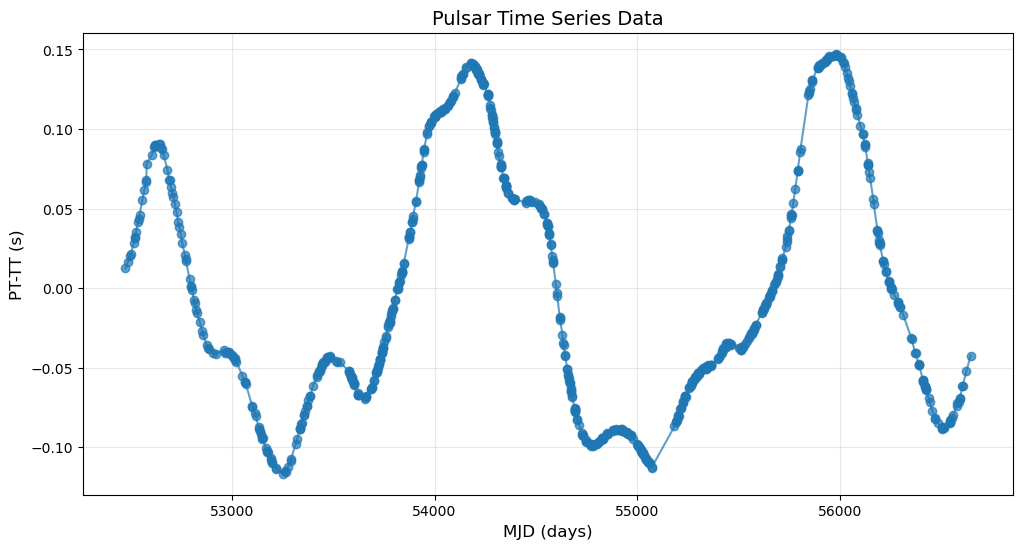

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = r'问题一未划分数据.xlsx'
data = pd.ExcelFile(file_path)

# Check sheet names
print(data.sheet_names)

# Load the data from the first sheet
df = data.parse('Sheet1')

# Display the first few rows of the data for inspection
print(df.head())

# Step 2: Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['MJD(days)'], df['PT-TT（s）'], marker='o', linestyle='-', alpha=0.7)
plt.title('Pulsar Time Series Data', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('PT-TT (s)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


['Sheet1']
      MJD(days)  PT-TT（s）
0  52473.159477  0.012398
1  52485.966358  0.016320
2  52497.096597  0.020257
3  52501.153015  0.021628
4  52516.081819  0.028444


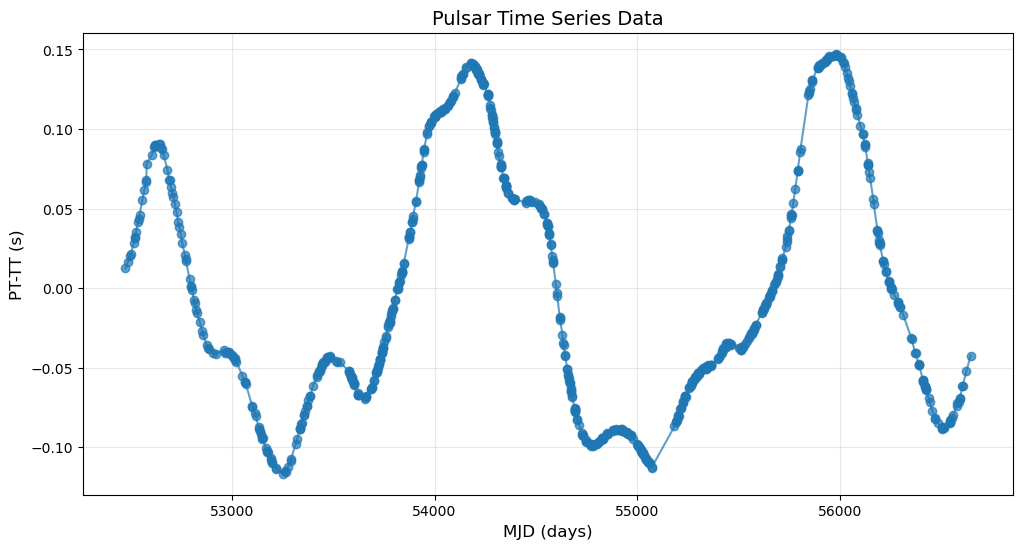

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = r'问题一未划分数据.xlsx'
data = pd.ExcelFile(file_path)

# Check sheet names
print(data.sheet_names)

# Load the data from the first sheet
df = data.parse('Sheet1')

# Display the first few rows of the data for inspection
print(df.head())

# Step 2: Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['MJD(days)'], df['PT-TT（s）'], marker='o', linestyle='-', alpha=0.7)
plt.title('Pulsar Time Series Data', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('PT-TT (s)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


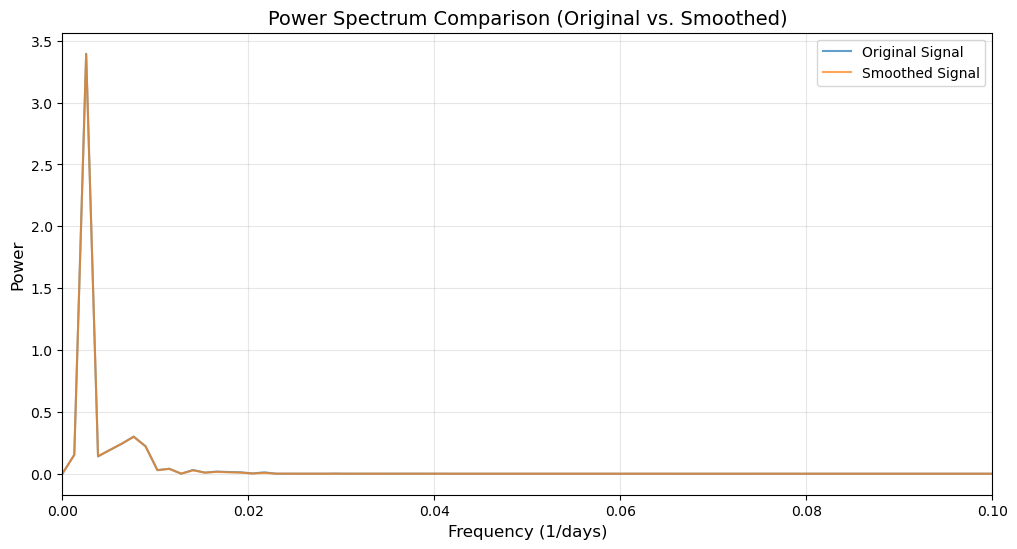

Signal-to-Noise Ratio (SNR): 41614.32


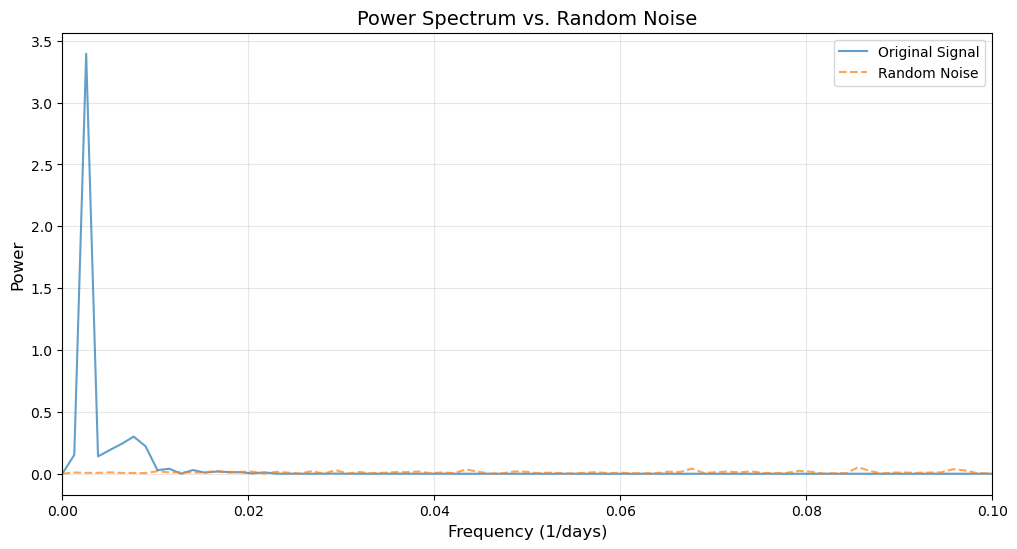

In [3]:
from scipy.signal import savgol_filter, periodogram
import numpy as np

# Step 1: Smooth the signal using Savitzky-Golay filter
smoothed_signal = savgol_filter(df['PT-TT（s）'], window_length=51, polyorder=3)

# Step 2: Recalculate the power spectrum for the original and smoothed signal
frequencies, power_original = periodogram(df['PT-TT（s）'], fs=1, scaling='density')
_, power_smoothed = periodogram(smoothed_signal, fs=1, scaling='density')

# Step 3: Plot the power spectrum comparison
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_original, label='Original Signal', alpha=0.7)
plt.plot(frequencies, power_smoothed, label='Smoothed Signal', alpha=0.7)
plt.title('Power Spectrum Comparison (Original vs. Smoothed)', fontsize=14)
plt.xlabel('Frequency (1/days)', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 0.1)  # Focus on low frequencies
plt.show()

# Step 4: Calculate Signal-to-Noise Ratio (SNR)
dominant_power = max(power_original)
background_noise_power = np.mean(power_original[frequencies > 0.02])  # Noise at higher frequencies
snr = dominant_power / background_noise_power

print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

# Step 5: Monte Carlo Simulation
np.random.seed(42)
random_signal = np.random.normal(0, np.std(df['PT-TT（s）']), len(df['PT-TT（s）']))
frequencies_random, power_random = periodogram(random_signal, fs=1, scaling='density')

# Plot comparison with random noise
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_original, label='Original Signal', alpha=0.7)
plt.plot(frequencies_random, power_random, label='Random Noise', alpha=0.7, linestyle='--')
plt.title('Power Spectrum vs. Random Noise', fontsize=14)
plt.xlabel('Frequency (1/days)', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 0.1)  # Focus on low frequencies
plt.show()


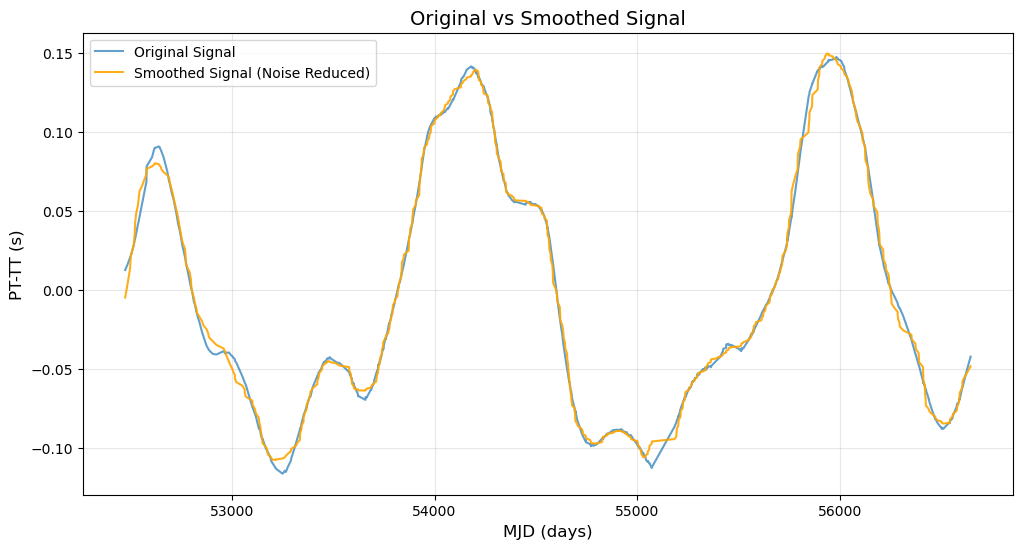

In [4]:
# Recalculate the smoothed signal using Savitzky-Golay filter
from scipy.signal import savgol_filter

smoothed_signal = savgol_filter(df['PT-TT（s）'], window_length=51, polyorder=3)

# Plot the original signal and smoothed signal for noise reduction visualization
plt.figure(figsize=(12, 6))
plt.plot(df['MJD(days)'], df['PT-TT（s）'], label='Original Signal', alpha=0.7)
plt.plot(df['MJD(days)'], smoothed_signal, label='Smoothed Signal (Noise Reduced)', alpha=0.9, color='orange')
plt.title('Original vs Smoothed Signal', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('PT-TT (s)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


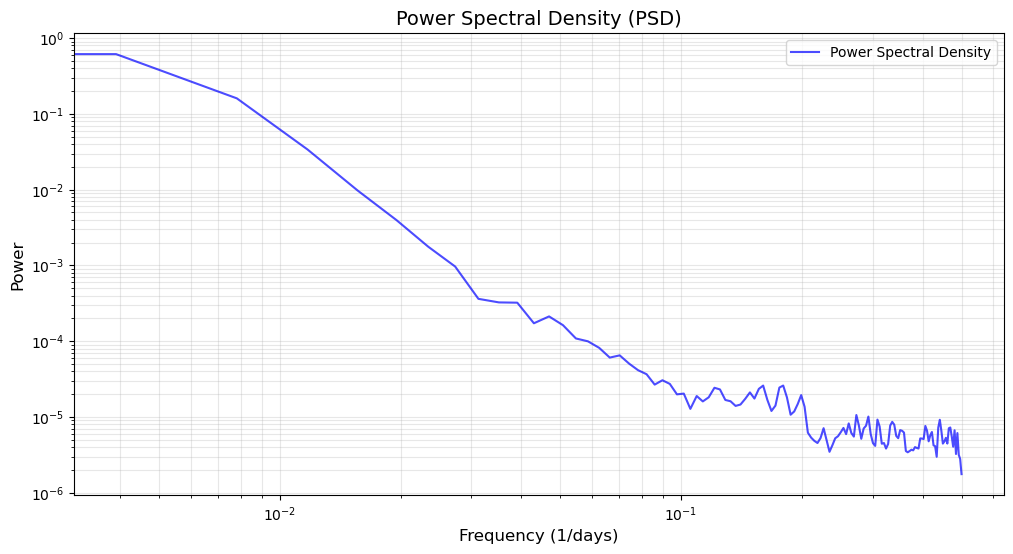

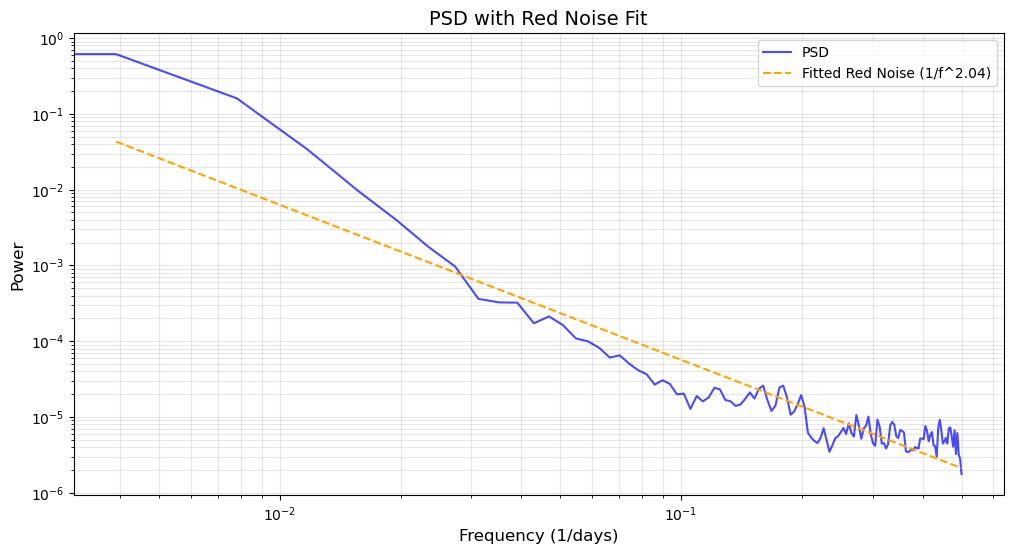

White Noise Level: 4.75e-05
Red Noise Exponent (α): 2.04


In [5]:
from scipy.signal import welch
import numpy as np

# Step 1: Power Spectral Density (PSD) Analysis using Welch's Method
frequencies, psd = welch(df['PT-TT（s）'], fs=1, nperseg=256, scaling='density')

# Plot the PSD
plt.figure(figsize=(12, 6))
plt.loglog(frequencies, psd, label='Power Spectral Density', color='blue', alpha=0.7)
plt.title('Power Spectral Density (PSD)', fontsize=14)
plt.xlabel('Frequency (1/days)', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.show()

# Step 2: Fit a noise model to distinguish white and red noise
# Red noise typically follows a power law: P(f) ∝ 1/f^α
log_frequencies = np.log10(frequencies[1:])  # Avoid log(0)
log_psd = np.log10(psd[1:])

# Linear fit in log-log scale to estimate the slope (α)
coefficients = np.polyfit(log_frequencies, log_psd, 1)
alpha = -coefficients[0]  # Slope indicates the power law exponent
intercept = coefficients[1]

# Plot the fitted line for red noise
plt.figure(figsize=(12, 6))
plt.loglog(frequencies, psd, label='PSD', color='blue', alpha=0.7)
plt.plot(frequencies[1:], 10**(intercept + coefficients[0] * log_frequencies), 
         label=f'Fitted Red Noise (1/f^{alpha:.2f})', color='orange', linestyle='--')
plt.title('PSD with Red Noise Fit', fontsize=14)
plt.xlabel('Frequency (1/days)', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.show()

# Step 3: Quantify white noise level (flat baseline in PSD)
white_noise_level = np.mean(psd[frequencies > 0.02])  # High frequencies approximate white noise
print(f"White Noise Level: {white_noise_level:.2e}")
print(f"Red Noise Exponent (α): {alpha:.2f}")


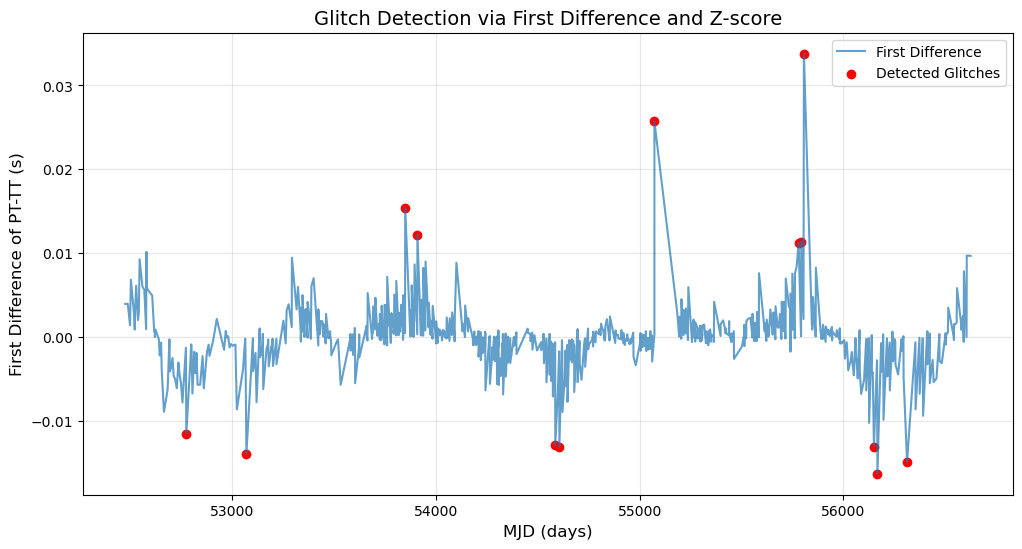

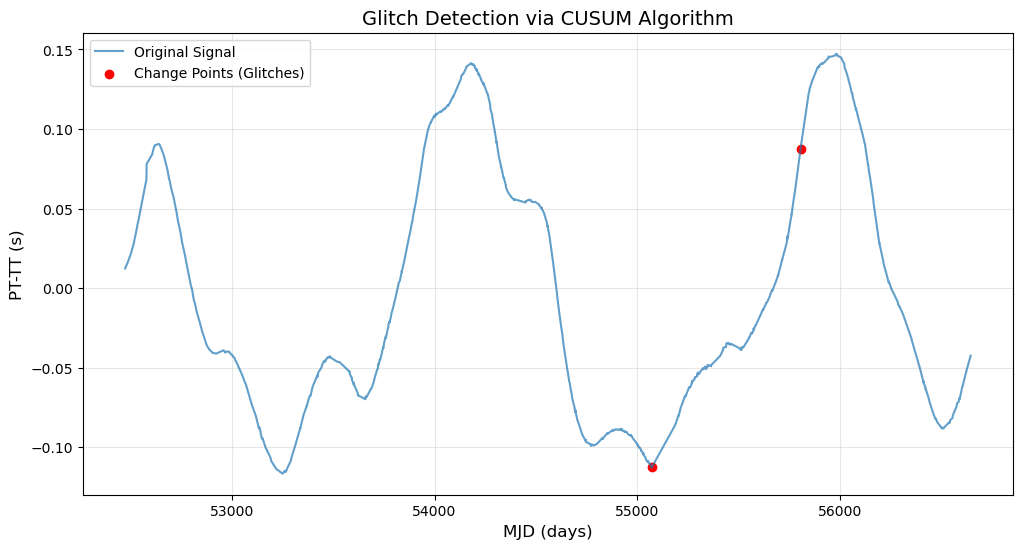

Number of glitches detected: 2
Glitch times (MJD days): [55072.23814267 55806.31099499]


In [6]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Step 1: Calculate the first difference of the signal
diff_signal = np.diff(df['PT-TT（s）'])

# Step 2: Detect anomalies using Z-score
z_scores = zscore(diff_signal)
threshold = 3  # Define a Z-score threshold for anomaly detection
anomalies = np.where(np.abs(z_scores) > threshold)[0]

# Plot the original signal and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['MJD(days)'][:-1], diff_signal, label='First Difference', alpha=0.7)
plt.scatter(df['MJD(days)'][anomalies], diff_signal[anomalies], color='red', label='Detected Glitches')
plt.title('Glitch Detection via First Difference and Z-score', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('First Difference of PT-TT (s)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Step 3: Advanced - CUSUM Algorithm for Change Point Detection
def cusum(data, threshold=1):
    pos, neg = 0, 0
    change_points = []
    for i, x in enumerate(data):
        pos = max(0, pos + x - threshold)
        neg = min(0, neg + x + threshold)
        if pos > threshold or neg < -threshold:
            change_points.append(i)
            pos, neg = 0, 0
    return change_points

cusum_changes = cusum(diff_signal, threshold=0.01)

# Plot the original signal with detected change points
plt.figure(figsize=(12, 6))
plt.plot(df['MJD(days)'], df['PT-TT（s）'], label='Original Signal', alpha=0.7)
plt.scatter(df['MJD(days)'][cusum_changes], df['PT-TT（s）'][cusum_changes], color='red', label='Change Points (Glitches)')
plt.title('Glitch Detection via CUSUM Algorithm', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('PT-TT (s)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Step 4: Quantify Glitches
print(f"Number of glitches detected: {len(cusum_changes)}")
print(f"Glitch times (MJD days): {df['MJD(days)'][cusum_changes].values}")


d:\software\anaconda\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


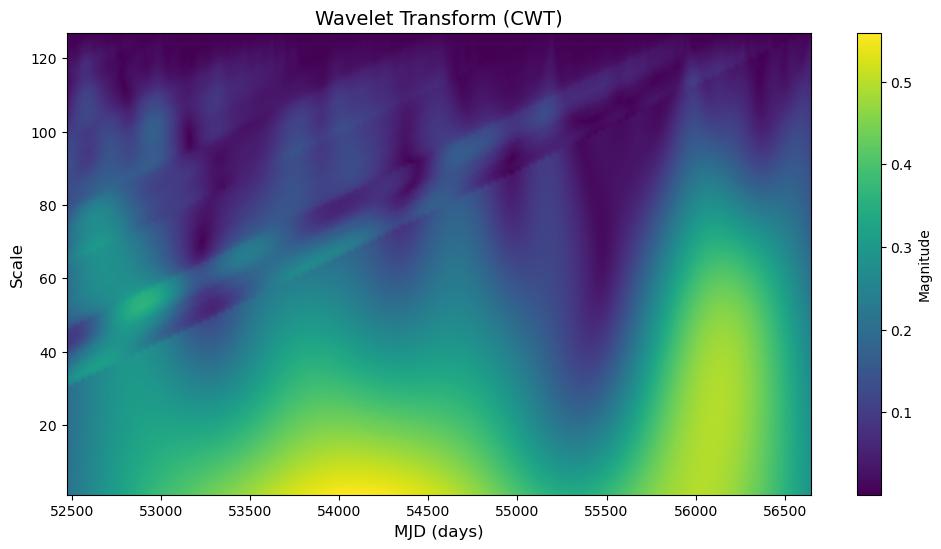

In [7]:
import pywt
import matplotlib.pyplot as plt

# Step 1: Perform Continuous Wavelet Transform (CWT)
signal = df['PT-TT（s）'] - np.mean(df['PT-TT（s）'])  # Remove mean
scales = np.arange(1, 128)  # Define scales for wavelet analysis
coefficients, frequencies = pywt.cwt(signal, scales, 'cmor')  # Use Morlet wavelet

# Step 2: Visualize the wavelet coefficients
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), extent=[df['MJD(days)'].min(), df['MJD(days)'].max(), scales.min(), scales.max()],
           cmap='viridis', aspect='auto', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Transform (CWT)', fontsize=14)
plt.xlabel('MJD (days)', fontsize=12)
plt.ylabel('Scale', fontsize=12)
plt.show()
